##### Xem chi tiết tại: https://www.youtube.com/watch?v=GL3hkmRQsaE&list=PLyxSzL3F7485ARPrhaoAfrg-NtbTIlZiy&index=22

# Hình thái học (morphology)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

In [2]:
path = '.\\img\\animal01.jpg'
im = Image.open(path).convert('L')
arr = np.array(im)
arr.shape, arr

((339, 509),
 array([[84, 84, 84, ..., 86, 82, 84],
        [84, 84, 84, ..., 87, 86, 86],
        [84, 84, 84, ..., 82, 86, 83],
        ...,
        [84, 84, 84, ..., 84, 84, 84],
        [84, 84, 84, ..., 84, 84, 84],
        [84, 84, 84, ..., 84, 84, 84]], dtype=uint8))

In [3]:
threshold = 200
binary_arr = (arr > threshold).astype(dtype='uint8')  # khi > theshold ==> 1 và <= theshold ==> 0
binary_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
labelled_arr, num_of_features = ndimage.label(binary_arr)  # đ hiểu thì chatGPT nhé
num_of_features, labelled_arr

(127,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

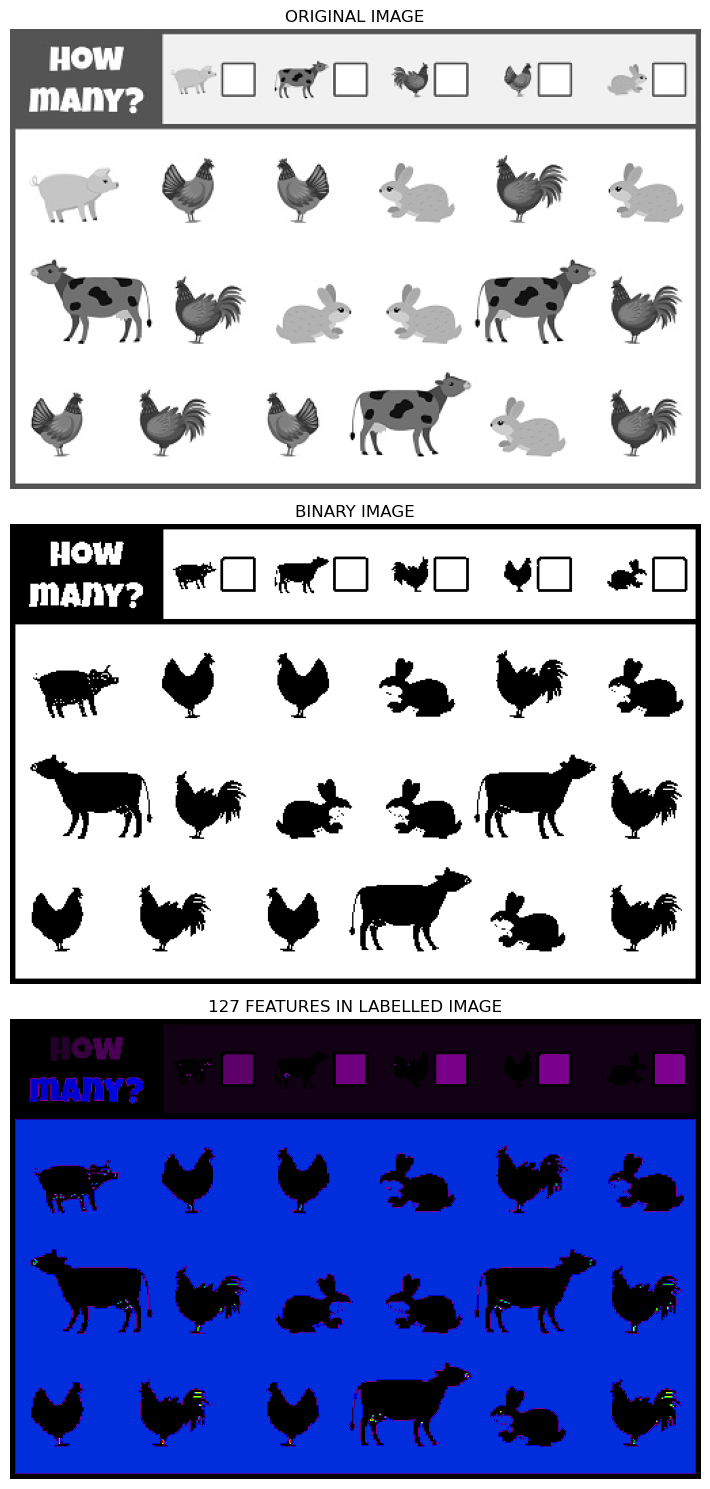

In [5]:
fig, subs = plt.subplots(ncols=1, nrows=3, figsize=(13,15))

sub1, sub2, sub3 = subs

sub1.imshow(arr, cmap='gray'); sub1.set_title('ORIGINAL IMAGE')
sub2.imshow(binary_arr, cmap='gray'); sub2.set_title('BINARY IMAGE')
sub3.imshow(labelled_arr, cmap='nipy_spectral'); sub3.set_title('{} FEATURES IN LABELLED IMAGE'.format(num_of_features))

for i in subs:
    i.axis('off')

fig.tight_layout()

# Các phép toán hình thái học cơ bản

### Erosion

### Dilation

### Opening = Erosion -> Dilation

(-0.5, 508.5, 338.5, -0.5)

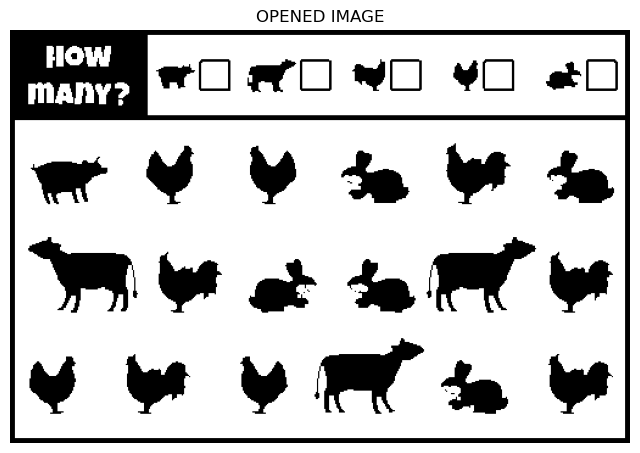

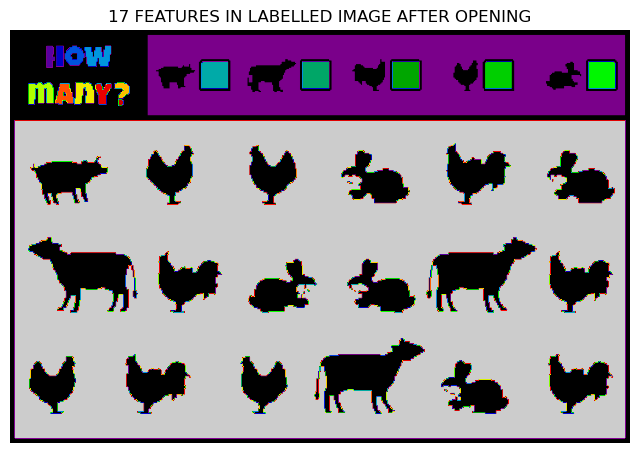

In [6]:
opened_arr = ndimage.binary_opening(binary_arr, structure=np.ones(shape=(3, 3))).astype('uint8')
labelled_opened_arr, num2_features = ndimage.label(opened_arr)

plt.figure(figsize=(8,6))
plt.imshow(opened_arr, cmap='gray')
plt.title('OPENED IMAGE')
plt.axis('off')

plt.figure(figsize=(8,6))
plt.imshow(labelled_opened_arr, cmap='nipy_spectral')
plt.title('{} FEATURES IN LABELLED IMAGE AFTER OPENING'.format(num2_features))
plt.axis('off')

### Closing = Dilation -> Erosion

(-0.5, 508.5, 338.5, -0.5)

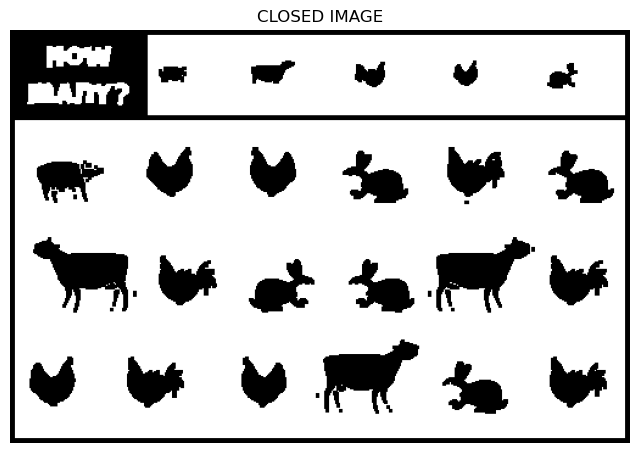

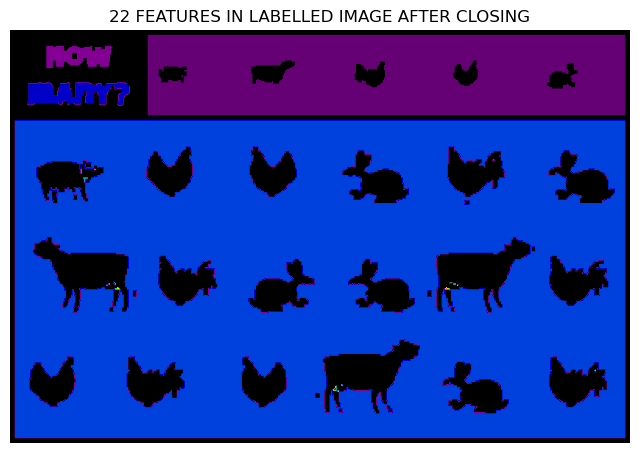

In [7]:
closed_arr = ndimage.binary_closing(binary_arr, structure=np.ones(shape=(3, 3))).astype('uint8')
labelled_closed_arr, num3_features = ndimage.label(closed_arr)

plt.figure(figsize=(8,6))
plt.imshow(closed_arr, cmap='gray')
plt.title('CLOSED IMAGE')
plt.axis('off')

plt.figure(figsize=(8,6))
plt.imshow(labelled_closed_arr, cmap='nipy_spectral')
plt.title('{} FEATURES IN LABELLED IMAGE AFTER CLOSING'.format(num3_features))
plt.axis('off')

# SUMMARY

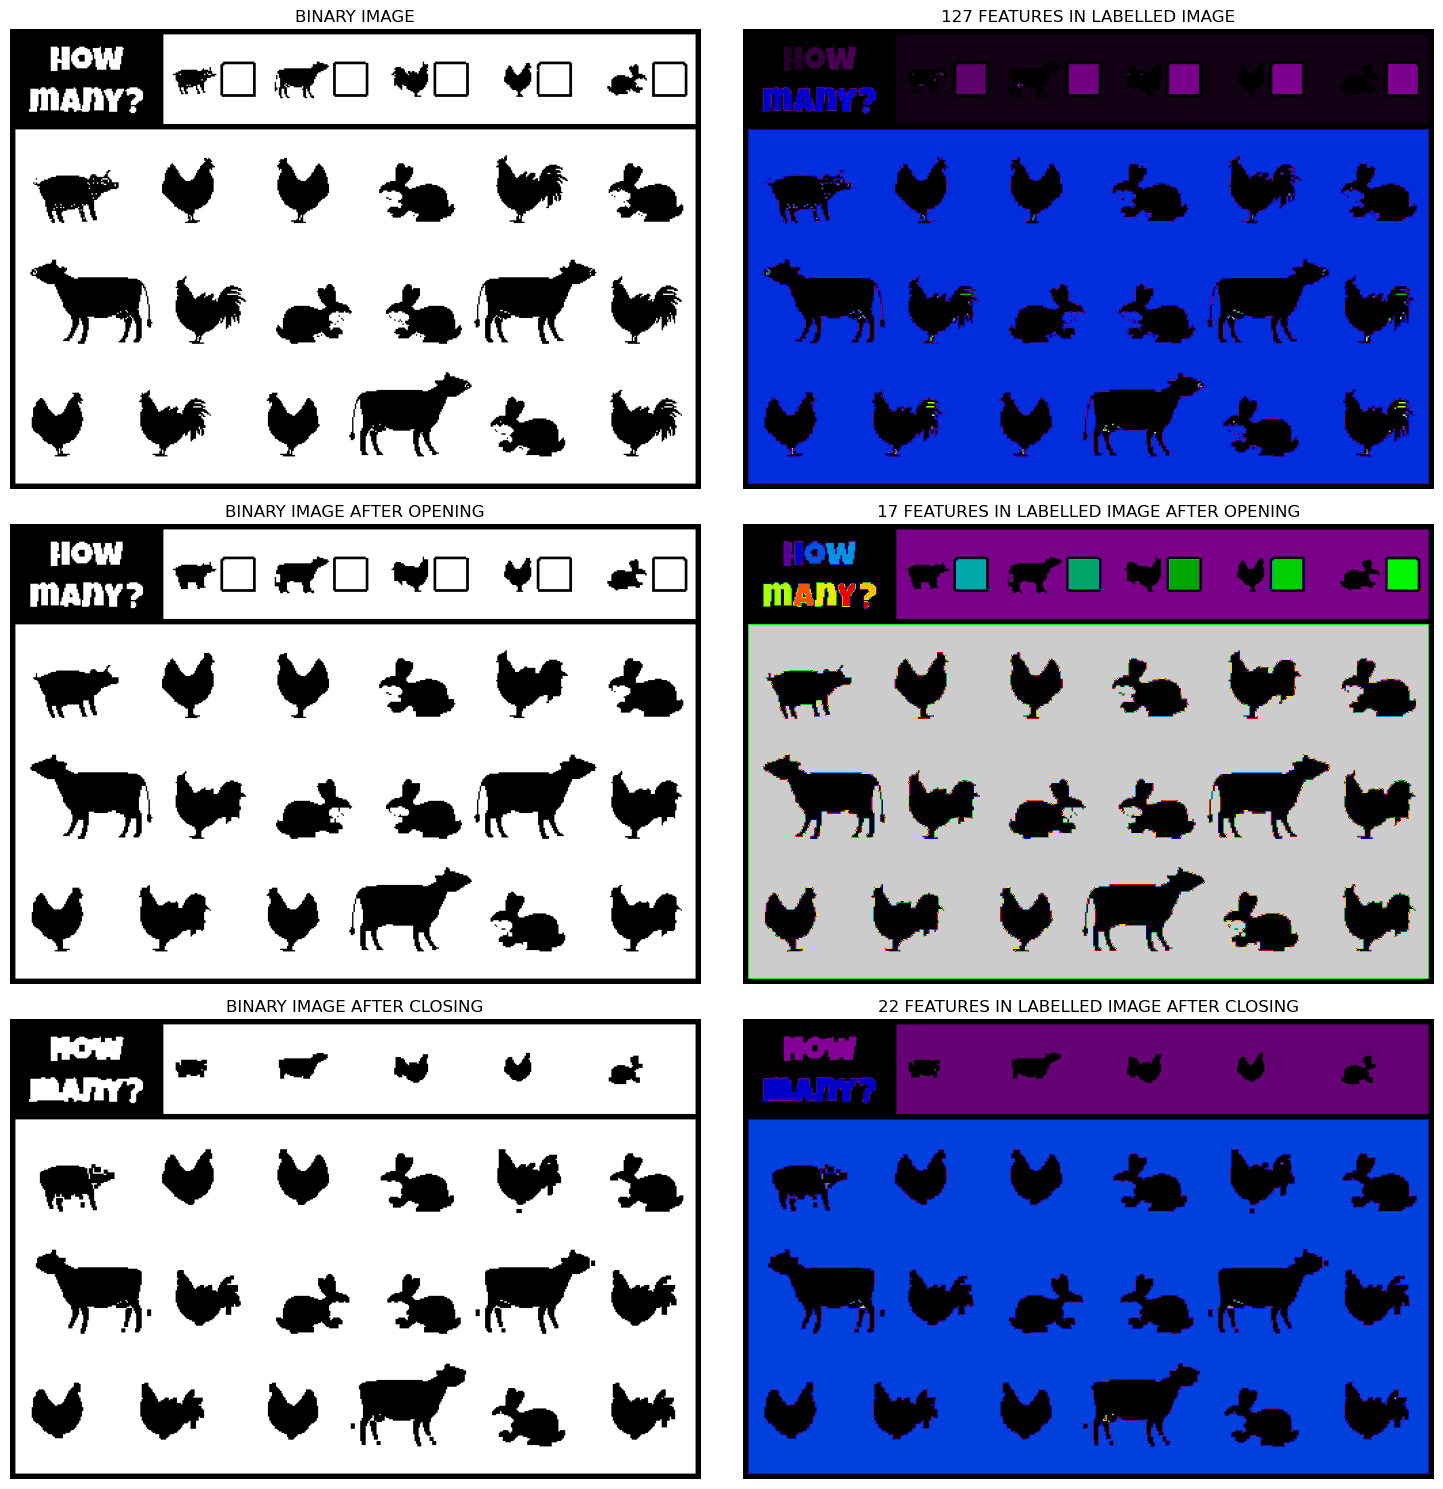

In [8]:
fig, subs = plt.subplots(ncols=2, nrows=3, figsize=(15,15))

sub1, sub2, sub3, sub4, sub5, sub6 = subs.flatten()

sub1.imshow(binary_arr, cmap='gray')
sub1.set_title('BINARY IMAGE')

sub2.imshow(labelled_arr, cmap='nipy_spectral')
sub2.set_title('{} FEATURES IN LABELLED IMAGE'.format(num_of_features))

sub3.imshow(opened_arr, cmap='gray')
sub3.set_title('BINARY IMAGE AFTER OPENING')

sub4.imshow(labelled_opened_arr, cmap='nipy_spectral')
sub4.set_title('{} FEATURES IN LABELLED IMAGE AFTER OPENING'.format(num2_features))

sub5.imshow(closed_arr, cmap='gray')
sub5.set_title('BINARY IMAGE AFTER CLOSING')

sub6.imshow(labelled_closed_arr, cmap='nipy_spectral')
sub6.set_title('{} FEATURES IN LABELLED IMAGE AFTER CLOSING'.format(num3_features))

for i in subs.flatten():
    i.axis('off')

fig.tight_layout()